# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [14]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline

student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10],'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data


,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

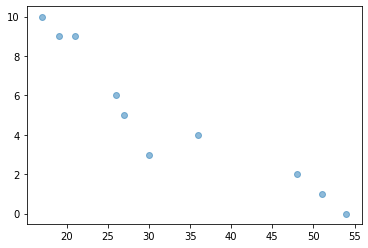

In [18]:
# Your code here.

plt.scatter(student_data.Age, student_data.Tardies, alpha=0.5)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
#The older are the least late, while the younger are the most.
#the relationship seems inversely proportional

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [21]:
# Your response here.
#correlation:
corr = student_data.corr()
corr 

#The corr varies from -1 to 1, and because in this case is so close to -1, it indicates
#that one variable is very affected by the other


,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [22]:
#covariance:
cov = student_data.cov()
cov

#covariance tells us how much two variables vary together. 
#Corr gives us the strengh of the relation, it's easier to understand.

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

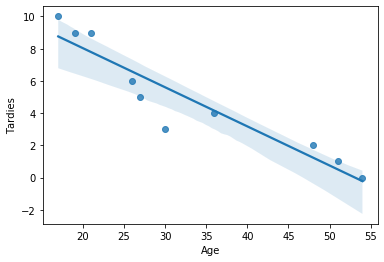

In [24]:
# Your response here.
sns.regplot(x="Age", y="Tardies", data=student_data)

Plot your regression model on your scatter plot.

In [26]:
# Your code here.
from scipy import stats
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#Y = b0 + b1*X
#b0 is the intercept
#b1 is the slope
# Tardies = 12.88 -0.24*Age
#looks like a good predictor.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/DATASETS/vehicles.csv')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [32]:
# Your response here. 
veh = vehicles[['CO2 Emission Grams/Mile','Year','Cylinders','Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']].copy()
veh.head(5)

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,522.764706,1984,4.0,19.388824,17,1950
1,683.615385,1984,6.0,25.354615,13,2550
2,555.437500,1985,4.0,20.600625,16,2100
3,683.615385,1985,6.0,25.354615,13,2550
4,555.437500,1987,6.0,20.600625,16,2550


In [44]:
corr = veh.corr()
corr['CO2 Emission Grams/Mile']

CO2 Emission Grams/Mile    1.000000
Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
#fuel is the most important determinant.Year of the car is the least helpful.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

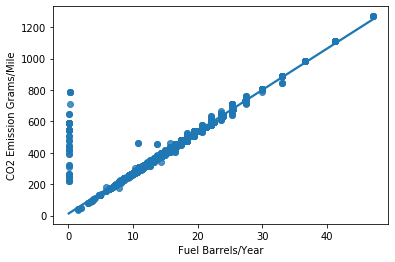

In [63]:
# Your response here. 
sns.regplot(x="Fuel Barrels/Year", y="CO2 Emission Grams/Mile", data=veh)
#The outliers are strange

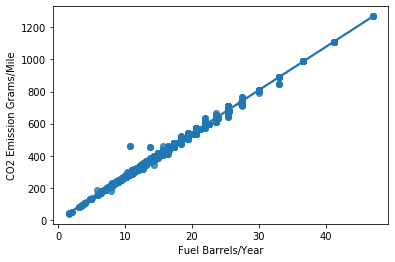

In [75]:
veh.sort_values(by = ['Fuel Barrels/Year'], ascending = True)
veh_clean = veh[veh['Fuel Barrels/Year'] > 1]
veh_clean.describe()
sns.regplot(x="Fuel Barrels/Year", y="CO2 Emission Grams/Mile", data=veh_clean)

In [46]:
#before cleaning
X = veh['Fuel Barrels/Year']
Y = veh['CO2 Emission Grams/Mile']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

#Y = b0 + b1*X
#b0 is the intercept
#b1 is the slope
# CO2 = 12.48 +26.83*Fuel Barrels/Year
#looks like a good predictor.

The slope is: 26.283625397470274
The intercept is: 12.486520830757001


In [76]:
#after cleaning
X = veh_clean['Fuel Barrels/Year']
Y = veh_clean['CO2 Emission Grams/Mile']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

#Y = b0 + b1*X
#b0 is the intercept
#b1 is the slope
# CO2 = 0.11 +26.94*Fuel Barrels/Year
#looks like a good predictor.

The slope is: 26.943570316616338
The intercept is: 0.11178074912874081


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [77]:
# Your response here. 
#now that I cleaned the outliers I am more confident.
#Fuel and CO2 are even more correlated.
corr = veh_clean.corr()
corr['CO2 Emission Grams/Mile']

CO2 Emission Grams/Mile    1.000000
Year                      -0.222417
Cylinders                  0.752388
Fuel Barrels/Year          0.999617
Combined MPG              -0.926343
Fuel Cost/Year             0.930710
filter_                         NaN
Name: CO2 Emission Grams/Mile, dtype: float64

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [86]:
# Your code here.
party = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14],'attended': [1,2,4,4,5,7,8,13]})
party

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

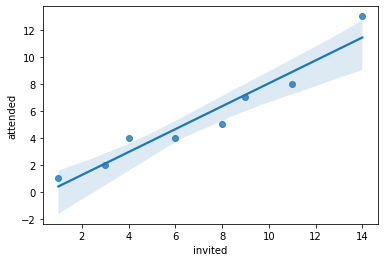

In [87]:
# Your code here.
sns.regplot(x="invited", y="attended", data=party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [80]:
# Your response here. 
party.corr()
#The more you invite, the more show up.

,invited,attended
invited,1.00000,0.96523
attended,0.96523,1.00000


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

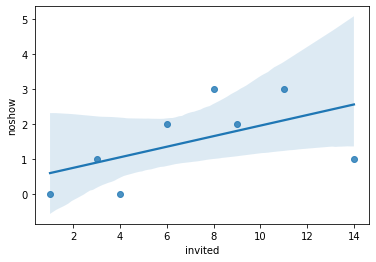

In [90]:
# Your response here. 
#we have to consider the amount of people that didn't show up

party['noshow'] = party['invited'] - party['attended']
party.corr()

sns.regplot(x="invited", y="noshow", data=party)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# The issue was how to approach the data, I think.